In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib
import seaborn as sns; sns.set_theme(color_codes=True)
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
sns.set_style(style='white')

In [3]:
os_meqtl_assoc = pd.read_csv("kaplan-meier/clumped_meqtl_os_assoc.csv")
os_meqtl_assoc

,Unnamed: 0,snps,os.time,cancer,min,maj,sum,freq,fdr,-log10(fdr),file,beta,p-value
0,0,1:15914135:A:G,0.000154,BRCA,11,462,473,0.023256,0.003700,2.431847,CASP9,0.203680,2.425760e-16
1,1,1:15914135:A:G,0.000011,KIRC,5,221,226,0.022124,0.000243,3.613808,CASP9,0.203680,2.425760e-16
2,2,8:29985683:A:G,0.001793,KIRP,2,124,126,0.015873,0.039437,1.404100,LEPROTL1,0.164385,8.768120e-11
3,3,1:15828704:T:C,0.002606,SARC,24,81,105,0.228571,0.054729,1.261779,CASP9,0.262803,3.600040e-47
4,4,10:88532238:A:T,0.006771,SKCM,3,215,218,0.013761,0.049658,1.304014,BMPR1A,-0.139622,1.459610e-07
5,5,15:50755396:C:T,0.000559,SKCM,16,184,200,0.080000,0.012306,1.909866,USP8,-0.125879,1.559190e-09
6,6,15:50781963:T:A,0.001825,SKCM,42,98,140,0.300000,0.020072,1.697420,USP8,-0.086641,4.993940e-07
7,7,1:15828704:T:C,0.008689,TGCT,9,34,43,0.209302,0.082549,1.083290,CASP9,0.262803,3.600040e-47
8,8,1:15914135:A:G,0.000355,TGCT,2,45,47,0.042553,0.006738,2.171465,CASP9,0.203680,2.425760e-16
9,9,15:91443059:T:C,0.001842,UCS,5,5,10,0.500000,0.029471,1.530606,FES,0.202878,4.586300e-31


In [4]:
print(pd.unique(os_meqtl_assoc["file"]))

['CASP9' 'LEPROTL1' 'BMPR1A' 'USP8' 'FES']


In [3]:
lusc_meqtls = os_meqtl_assoc[os_meqtl_assoc["cancer"]=="LUSC"]
lusc_meqtls

,Unnamed: 0,snps,os.time,cancer,min,maj,sum,freq,fdr,-log10(fdr),file,beta,p-value
2,2,10:88648672:G:A,0.017260,LUSC,13,226,239,0.054393,0.079167,1.101458,BMPR1A,-0.096126,2.045360e-06
3,3,10:88660199:G:A,0.017448,LUSC,13,227,240,0.054167,0.079167,1.101458,BMPR1A,-0.095848,2.145120e-06
4,4,10:104225832:T:C,0.016637,LUSC,48,144,192,0.250000,0.078068,1.107528,SUFU,0.083221,3.524160e-06
5,5,10:104225837:T:G,0.016637,LUSC,48,144,192,0.250000,0.078068,1.107528,SUFU,0.083221,3.524160e-06
6,6,10:104235956:G:C,0.015112,LUSC,48,142,190,0.252632,0.072141,1.141816,SUFU,0.083290,3.349910e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,15:50771511:C:G,0.009303,LUSC,62,121,183,0.338798,0.072141,1.141816,USP8,-0.084014,1.061190e-06
120,120,15:50772479:C:T,0.019312,LUSC,52,135,187,0.278075,0.086903,1.060964,USP8,-0.085610,9.841140e-07
121,121,15:50778853:C:T,0.014476,LUSC,53,135,188,0.281915,0.072141,1.141816,USP8,-0.085136,1.121680e-06
122,122,15:50780214:C:A,0.014476,LUSC,53,135,188,0.281915,0.072141,1.141816,USP8,-0.086017,8.656000e-07


In [4]:
lusc_chr = set()
lusc_genes = set()
paad_chr = set()
paad_genes = set()
for i, row in os_meqtl_assoc.iterrows():
    if row["cancer"] == "LUSC":
        chr1 = row["snps"].split(":")[0]
        lusc_chr.add(chr1)
        lusc_genes.add(row["file"])
    if row["cancer"] == "PAAD":
        chr2 = row["snps"].split(":")[0]
        paad_chr.add(chr2)
        paad_genes.add(row["file"])

In [35]:
paad_chr

{'15', '16'}

In [34]:
lusc_chr

{'10', '15'}

In [36]:
lusc_genes

{'BMPR1A', 'SUFU', 'USP8'}

In [37]:
paad_genes

{'FANCA', 'USP8'}

In [5]:
gene1 = os_meqtl_assoc[os_meqtl_assoc["file"] == "CASP9"]
gene2 = os_meqtl_assoc[os_meqtl_assoc["file"] == "BMPR1A"]
gene3 = os_meqtl_assoc[os_meqtl_assoc["file"] == "LEPROTL1"]
gene4 = os_meqtl_assoc[os_meqtl_assoc["file"] == "USP8"]
gene5 = os_meqtl_assoc[os_meqtl_assoc["file"] == "FES"]

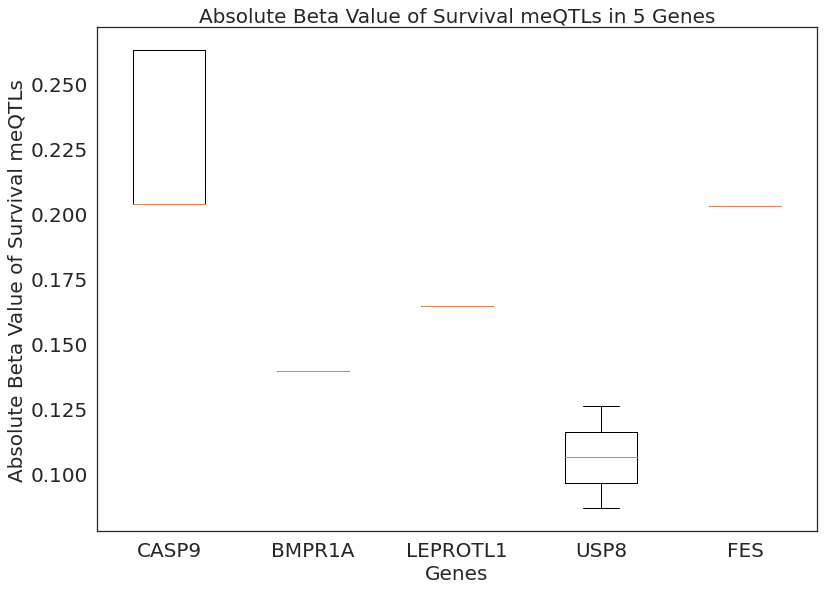

In [7]:
data = [np.abs(gene1["beta"]), np.abs(gene2["beta"]), np.abs(gene3["beta"]), np.abs(gene4["beta"]), np.abs(gene5["beta"])]
fig= plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxplt = ax.boxplot(data)
plt.ylabel("Absolute Beta Value of Survival meQTLs", fontsize=20)
plt.xlabel("Genes", fontsize=20)
plt.title("Absolute Beta Value of Survival meQTLs in 5 Genes", fontsize=20)
ax.set_xticklabels(['CASP9', 'BMPR1A', 'LEPROTL1', 'USP8', 'FES'], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [9]:
stats.kruskal(np.abs(gene1["beta"]), np.abs(gene4["beta"]))

KruskalResult(statistic=4.11764705882353, pvalue=0.042438063600300856)

In [10]:
common_TADs = pd.read_csv("common_TADs_meQTLs.csv")
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.167622,0.705304,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.226065,0.369001,219,4,122,97,825000,0.075906,0.042846,0.037893
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.275085,0.000000,283,4,90,194,340000,0.238009,0.076695,0.183891
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.244738,0.000000,301,4,201,189,655000,0.131405,0.088911,0.092995
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.499037,0.704529,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,1.000000,0.000000,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0,1,0,0,155000,0.000000,0.000000,0.000000


In [11]:
boundary_regions = pd.read_csv("boundary_regions.csv")
boundary_regions

,Unnamed: 0,chr1,x1,x2
0,0,1,7710000,7715000
1,1,1,8010000,8030000
2,2,1,8410000,9170000
3,3,1,9295000,9330000
4,4,1,9550000,11075000
...,...,...,...,...
1072,1072,X,108880000,108950000
1073,1073,X,109125000,109150000
1074,1074,X,109385000,117750000
1075,1075,X,117955000,133635000


In [12]:
num_active = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 2) | (common_TADs["KMeans_State_Labels"] == 3)])
num_inactive = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 1) | (common_TADs["KMeans_State_Labels"] == 4)])
num_mixed = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 0)])
num_boundary = 1077

In [13]:
print(num_active, num_inactive, num_mixed)

222 626 252


In [14]:
num_active_surv = 0
num_inactive_surv = 0
num_mixed_surv = 0
num_boundary_surv = 0
tad_status = []
for i, row in os_meqtl_assoc.iterrows():
    chr1, bp = (row["snps"].split(":")[0]), int(row["snps"].split(":")[1])
    overlap_chr = common_TADs[common_TADs["chr1"] == chr1]
    overlap_tad = overlap_chr[(bp>=overlap_chr["x1"])&(bp<=overlap_chr["x2"])]
    if len(overlap_tad)>0:
        if overlap_tad.iloc[0]["KMeans_State_Labels"]==0:
            num_mixed_surv+=1
            tad_status.append("Mixed")
        elif overlap_tad.iloc[0]["KMeans_State_Labels"]==1 or overlap_tad.iloc[0]["KMeans_State_Labels"]==4:
            num_inactive_surv+=1
            tad_status.append("Inactive")
        else:
            num_active_surv+=1
            tad_status.append("Active")
    else:
        overlap_chr2 = boundary_regions[boundary_regions["chr1"] == chr1]
        overlap_boundary = overlap_chr2[(bp>=overlap_chr2["x1"])&(bp<=overlap_chr2["x2"])]
        if len(overlap_boundary)>0:
            num_boundary_surv+=1
            tad_status.append("Boundary")
        else:
            tad_status.append("Neither")
        

In [15]:
os_meqtl_assoc["TAD Status"] = tad_status
os_meqtl_assoc

,Unnamed: 0,snps,os.time,cancer,min,maj,sum,freq,fdr,-log10(fdr),file,beta,p-value,TAD Status
0,0,1:15914135:A:G,0.000154,BRCA,11,462,473,0.023256,0.003700,2.431847,CASP9,0.203680,2.425760e-16,Active
1,1,1:15914135:A:G,0.000011,KIRC,5,221,226,0.022124,0.000243,3.613808,CASP9,0.203680,2.425760e-16,Active
2,2,8:29985683:A:G,0.001793,KIRP,2,124,126,0.015873,0.039437,1.404100,LEPROTL1,0.164385,8.768120e-11,Boundary
3,3,1:15828704:T:C,0.002606,SARC,24,81,105,0.228571,0.054729,1.261779,CASP9,0.262803,3.600040e-47,Boundary
4,4,10:88532238:A:T,0.006771,SKCM,3,215,218,0.013761,0.049658,1.304014,BMPR1A,-0.139622,1.459610e-07,Active
5,5,15:50755396:C:T,0.000559,SKCM,16,184,200,0.080000,0.012306,1.909866,USP8,-0.125879,1.559190e-09,Boundary
6,6,15:50781963:T:A,0.001825,SKCM,42,98,140,0.300000,0.020072,1.697420,USP8,-0.086641,4.993940e-07,Boundary
7,7,1:15828704:T:C,0.008689,TGCT,9,34,43,0.209302,0.082549,1.083290,CASP9,0.262803,3.600040e-47,Boundary
8,8,1:15914135:A:G,0.000355,TGCT,2,45,47,0.042553,0.006738,2.171465,CASP9,0.203680,2.425760e-16,Active
9,9,15:91443059:T:C,0.001842,UCS,5,5,10,0.500000,0.029471,1.530606,FES,0.202878,4.586300e-31,Active


In [16]:
active_meqtls = os_meqtl_assoc[os_meqtl_assoc["TAD Status"] == "Active"]
boundary_meqtls = os_meqtl_assoc[os_meqtl_assoc["TAD Status"] == "Boundary"]
inactive_meqtls = os_meqtl_assoc[os_meqtl_assoc["TAD Status"] == "Inactive"]
mixed_meqtls = os_meqtl_assoc[os_meqtl_assoc["TAD Status"] == "Mixed"]

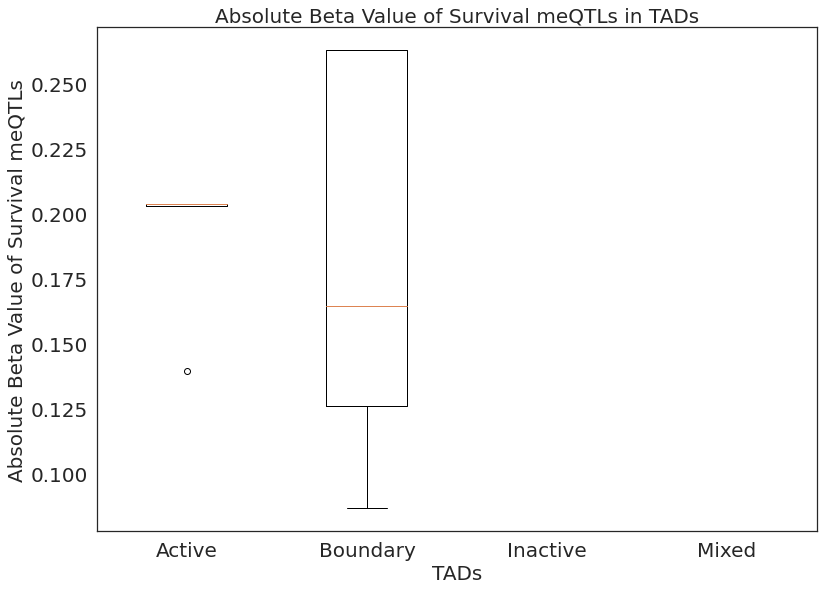

In [17]:
data6 = [np.abs(active_meqtls["beta"]), np.abs(boundary_meqtls["beta"]), np.abs(inactive_meqtls["beta"]), np.abs(mixed_meqtls["beta"])]
fig6= plt.figure(figsize =(10, 7))
ax6 = fig6.add_axes([0, 0, 1, 1])
boxplt6 = ax6.boxplot(data6)
plt.ylabel("Absolute Beta Value of Survival meQTLs", fontsize=20)
plt.xlabel("TADs", fontsize=20)
plt.title("Absolute Beta Value of Survival meQTLs in TADs", fontsize=20)
ax6.set_xticklabels(["Active", "Boundary", "Inactive", "Mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [24]:
stats.kruskal(np.abs(active_meqtls["beta"]), np.abs(boundary_meqtls["beta"]), np.abs(mixed_meqtls["beta"]))

KruskalResult(statistic=75.2369919844569, pvalue=4.597214555483952e-17)

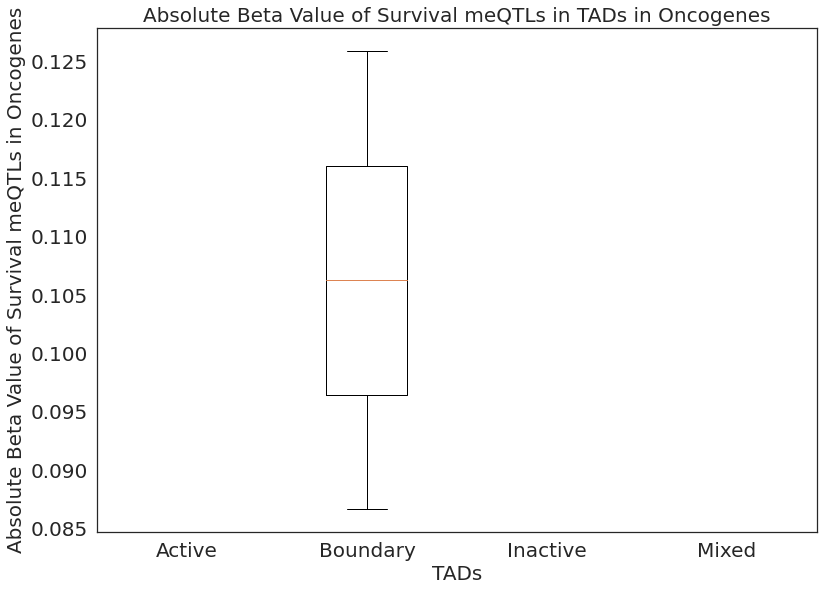

In [18]:
data7 = [np.abs(active_meqtls[active_meqtls["file"] == "USP8"]["beta"]), np.abs(boundary_meqtls[boundary_meqtls["file"] == "USP8"]["beta"]), np.abs(inactive_meqtls[inactive_meqtls["file"] == "USP8"]["beta"]), np.abs(mixed_meqtls[mixed_meqtls["file"] == "USP8"]["beta"])]
fig7= plt.figure(figsize =(10, 7))
ax7 = fig7.add_axes([0, 0, 1, 1])
boxplt7 = ax7.boxplot(data7)
plt.ylabel("Absolute Beta Value of Survival meQTLs in Oncogenes", fontsize=20)
plt.xlabel("TADs", fontsize=20)
plt.title("Absolute Beta Value of Survival meQTLs in TADs in Oncogenes", fontsize=20)
ax7.set_xticklabels(["Active", "Boundary", "Inactive", "Mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

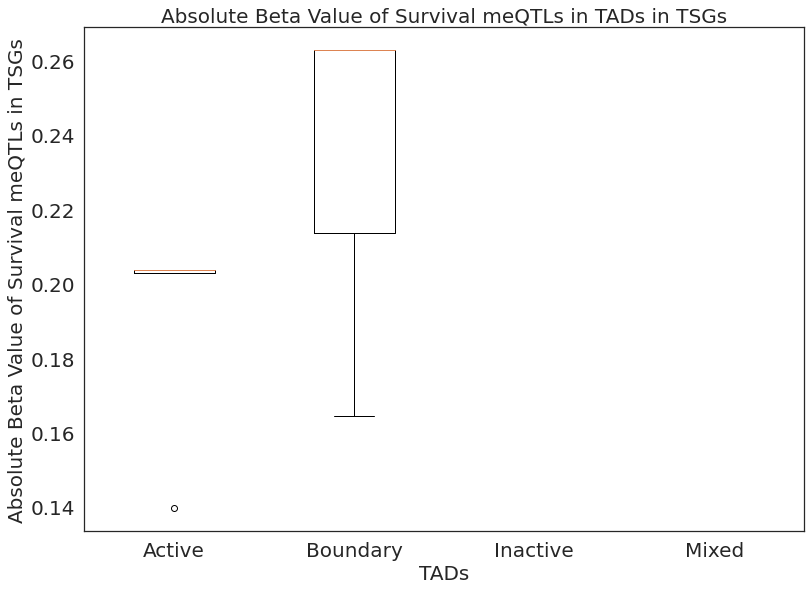

In [19]:
data8 = [np.abs(active_meqtls[active_meqtls["file"] != "USP8"]["beta"]), np.abs(boundary_meqtls[boundary_meqtls["file"] != "USP8"]["beta"]), np.abs(inactive_meqtls[inactive_meqtls["file"] != "USP8"]["beta"]), np.abs(mixed_meqtls[mixed_meqtls["file"] != "USP8"]["beta"])]
fig8= plt.figure(figsize =(10, 7))
ax8 = fig8.add_axes([0, 0, 1, 1])
boxplt8 = ax8.boxplot(data8)
plt.ylabel("Absolute Beta Value of Survival meQTLs in TSGs", fontsize=20)
plt.xlabel("TADs", fontsize=20)
plt.title("Absolute Beta Value of Survival meQTLs in TADs in TSGs", fontsize=20)
ax8.set_xticklabels(["Active", "Boundary", "Inactive", "Mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [20]:
stats.ttest_ind(np.abs(active_meqtls[active_meqtls["file"] != "USP8"]["beta"]), np.abs(boundary_meqtls[boundary_meqtls["file"] != "USP8"]["beta"]), equal_var=False)

Ttest_indResult(statistic=-1.116016629874919, pvalue=0.3561586495063269)

In [21]:
onco_meqtl_surv = os_meqtl_assoc[os_meqtl_assoc["file"] == "USP8"]
tsg_meqtl_surv = os_meqtl_assoc[os_meqtl_assoc["file"] != "USP8"]

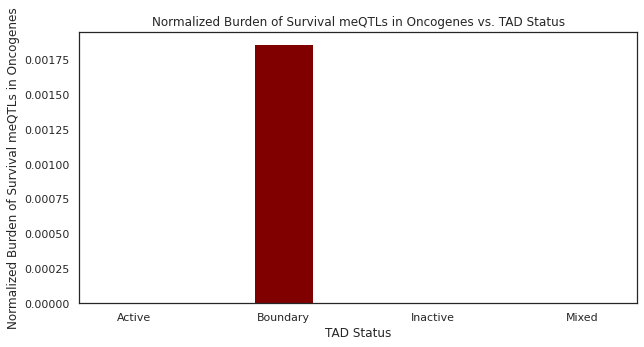

In [22]:
data3= {'Active': len(onco_meqtl_surv[onco_meqtl_surv["TAD Status"] == "Active"])/num_active , 'Boundary': len(onco_meqtl_surv[onco_meqtl_surv["TAD Status"] == "Boundary"])/num_boundary, 'Inactive': len(onco_meqtl_surv[onco_meqtl_surv["TAD Status"] == "Inactive"])/num_inactive, 'Mixed': len(onco_meqtl_surv[onco_meqtl_surv["TAD Status"] == "Mixed"])/num_mixed}
num3 = list(data3.keys())
values3 = list(data3.values())

fig3 = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(num3, values3, color ='maroon',
        width = 0.4)

plt.xlabel("TAD Status")
plt.ylabel("Normalized Burden of Survival meQTLs in Oncogenes")
plt.title("Normalized Burden of Survival meQTLs in Oncogenes vs. TAD Status")
plt.show()

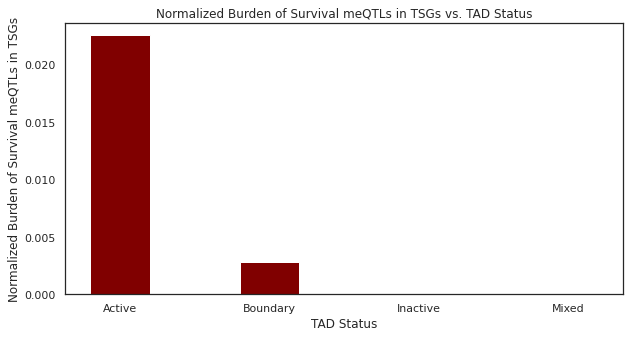

In [23]:
data4= {'Active': len(tsg_meqtl_surv[tsg_meqtl_surv["TAD Status"] == "Active"])/num_active , 'Boundary': len(tsg_meqtl_surv[tsg_meqtl_surv["TAD Status"] == "Boundary"])/num_boundary, 'Inactive': len(tsg_meqtl_surv[tsg_meqtl_surv["TAD Status"] == "Inactive"])/num_inactive, 'Mixed': len(tsg_meqtl_surv[tsg_meqtl_surv["TAD Status"] == "Mixed"])/num_mixed}
num4 = list(data4.keys())
values4 = list(data4.values())

fig4 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(num4, values4, color ='maroon',
        width = 0.4)

plt.xlabel("TAD Status")
plt.ylabel("Normalized Burden of Survival meQTLs in TSGs")
plt.title("Normalized Burden of Survival meQTLs in TSGs vs. TAD Status")
plt.show()

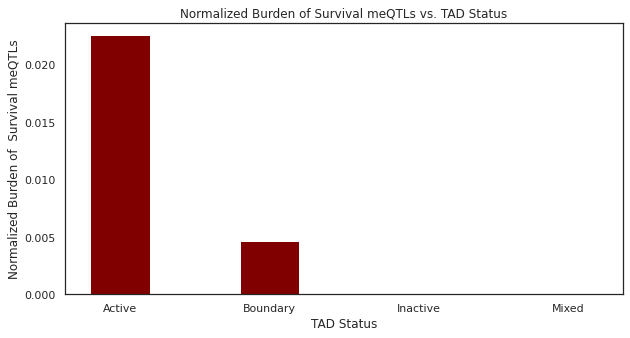

In [24]:
data2= {'Active': num_active_surv/num_active , 'Boundary': num_boundary_surv/num_boundary, 'Inactive': num_inactive_surv/num_inactive, 'Mixed': num_mixed_surv/num_mixed}
num2 = list(data2.keys())
values2 = list(data2.values())

fig2 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(num2, values2, color ='maroon',
        width = 0.4)

plt.xlabel("TAD Status")
plt.ylabel("Normalized Burden of  Survival meQTLs")
plt.title("Normalized Burden of Survival meQTLs vs. TAD Status")
plt.show()